In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/anura/Downloads/diabetes1.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.Insulin.value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Pregnancies', ylabel='count'>

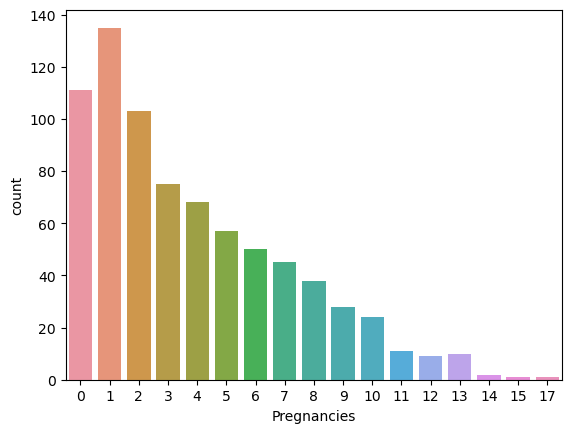

In [9]:
sns.countplot(x="Pregnancies", data=data)
#Maximum patients have conceded 1 and 0

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

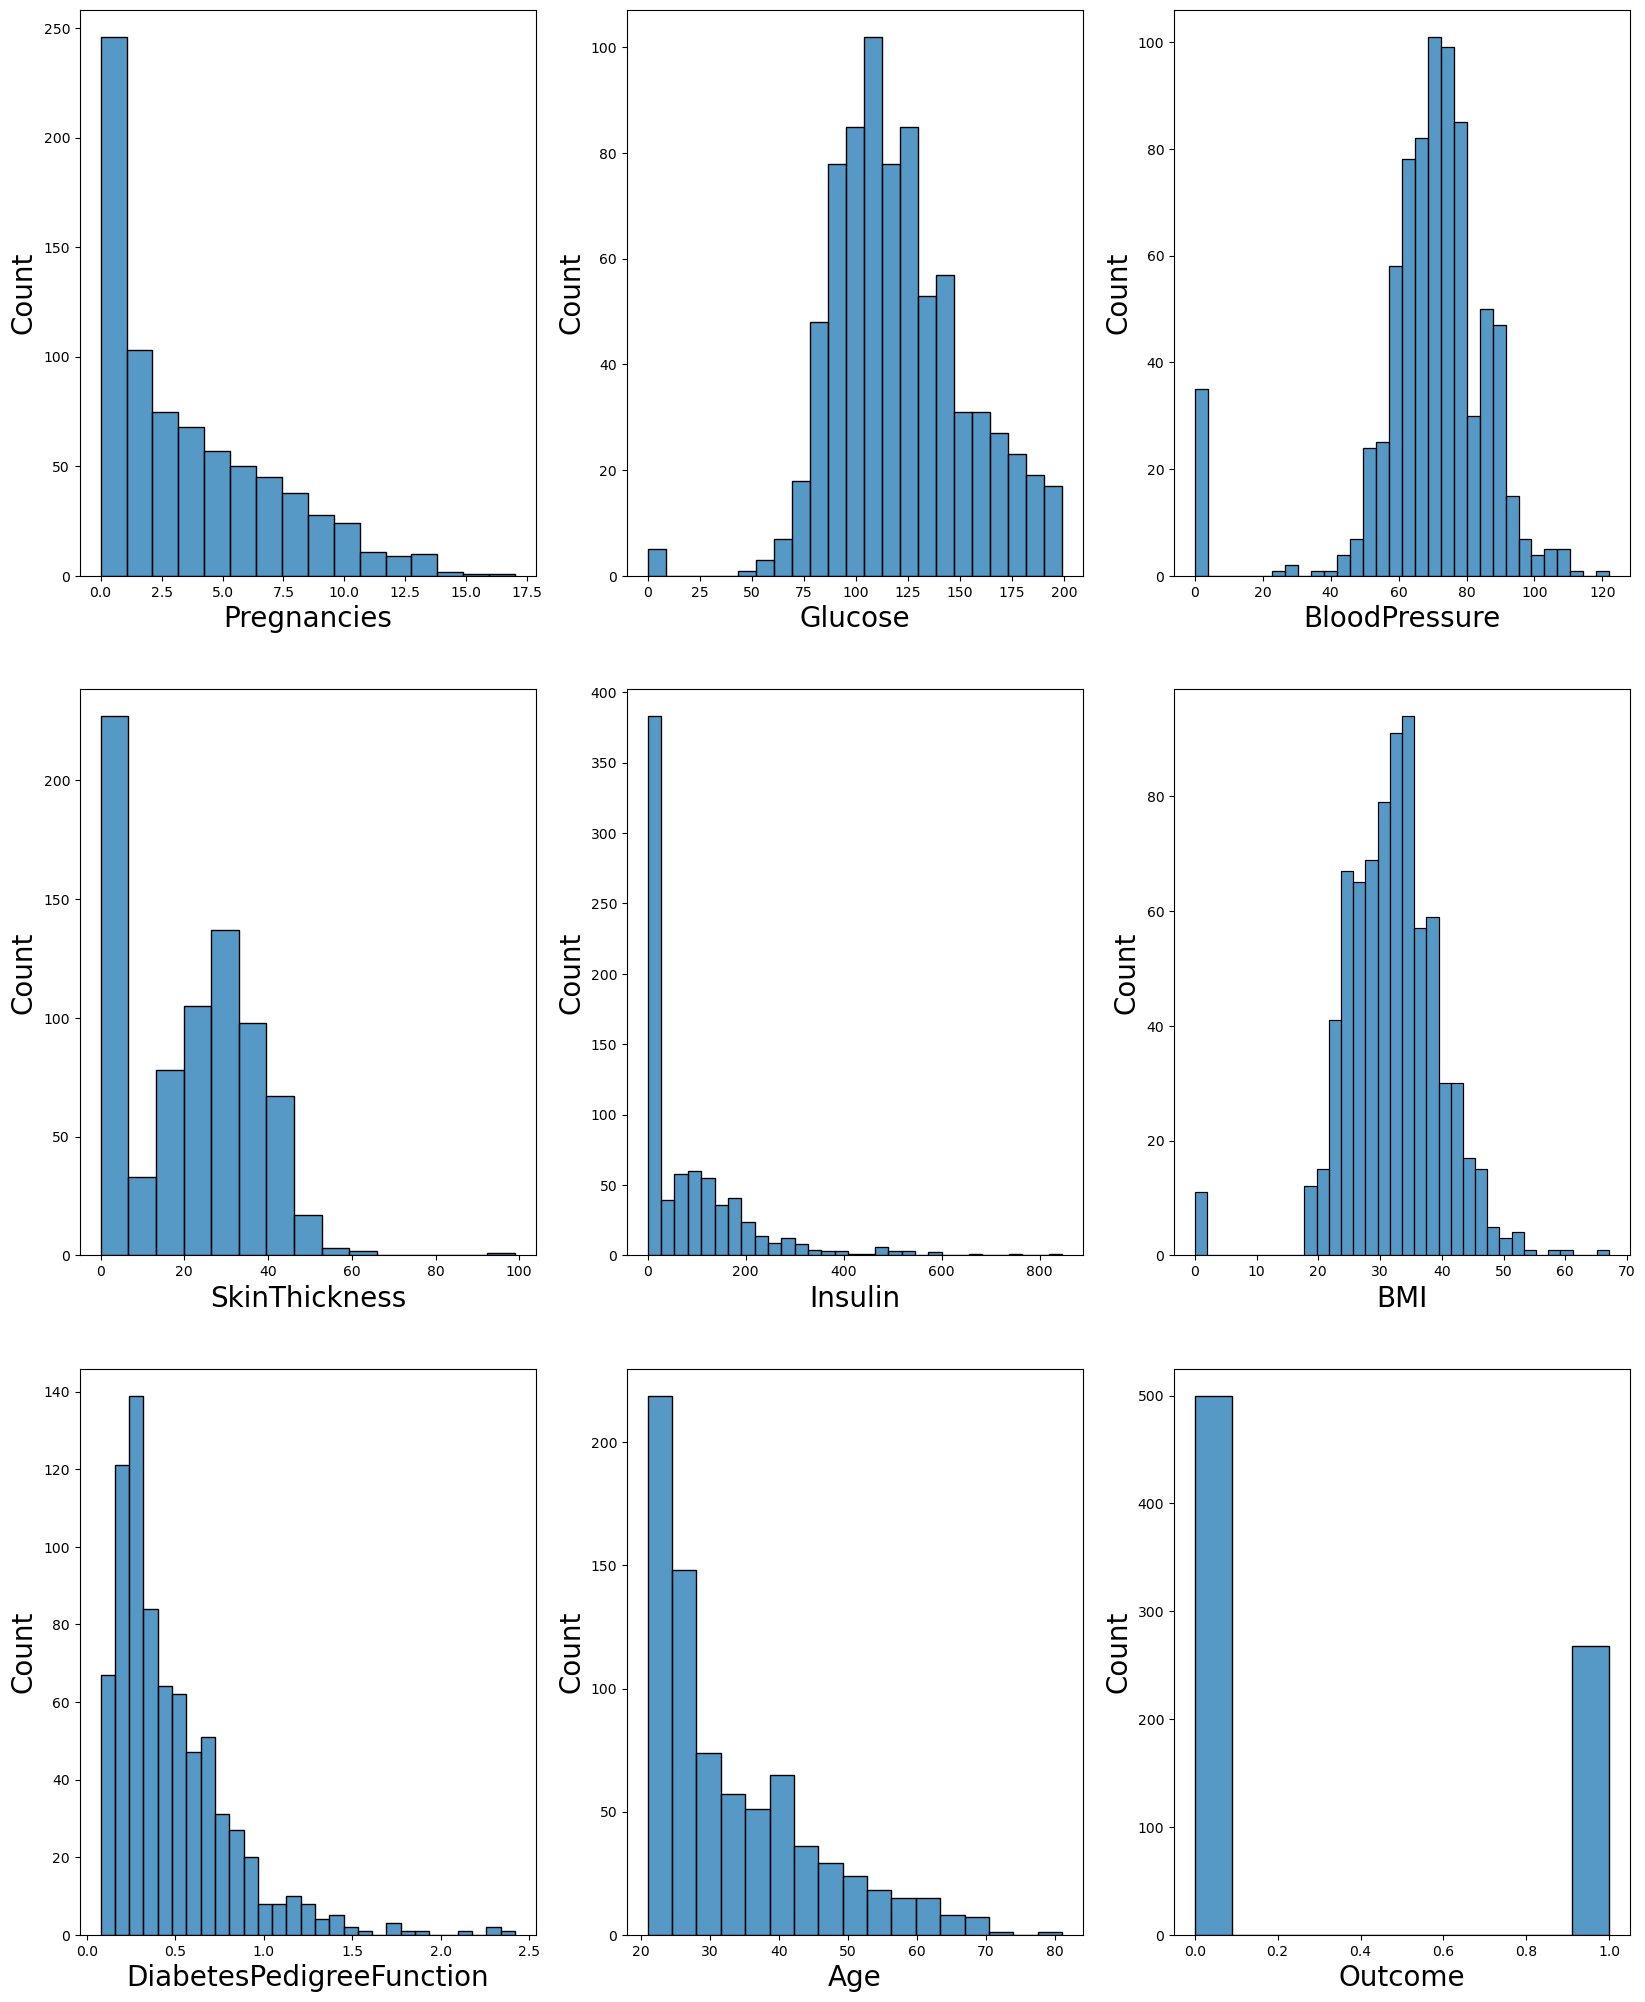

In [12]:
plt.figure(figsize=(20,25), facecolor="white") #creates a canvas
plotnumber=1

for column in data:
    ax=plt.subplot(3,3,plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plotnumber+=1
plt.tight_layout

## Data Preprocessing and Feature Engineering

In [3]:
np.median(data.Glucose)

117.0

In [4]:
## Step 2 Handling the corrupted data.
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
data.Glucose.replace(0,np.median(data.Glucose),inplace=True) # 0 will be replaced with the median values

#dataframe.colum.replace('Value to be replaced','By what value')


In [6]:
data.loc[data['BMI']==0]  #fetching where BMI is 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [7]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [8]:
## Step 3:-Numerical representation of string data

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

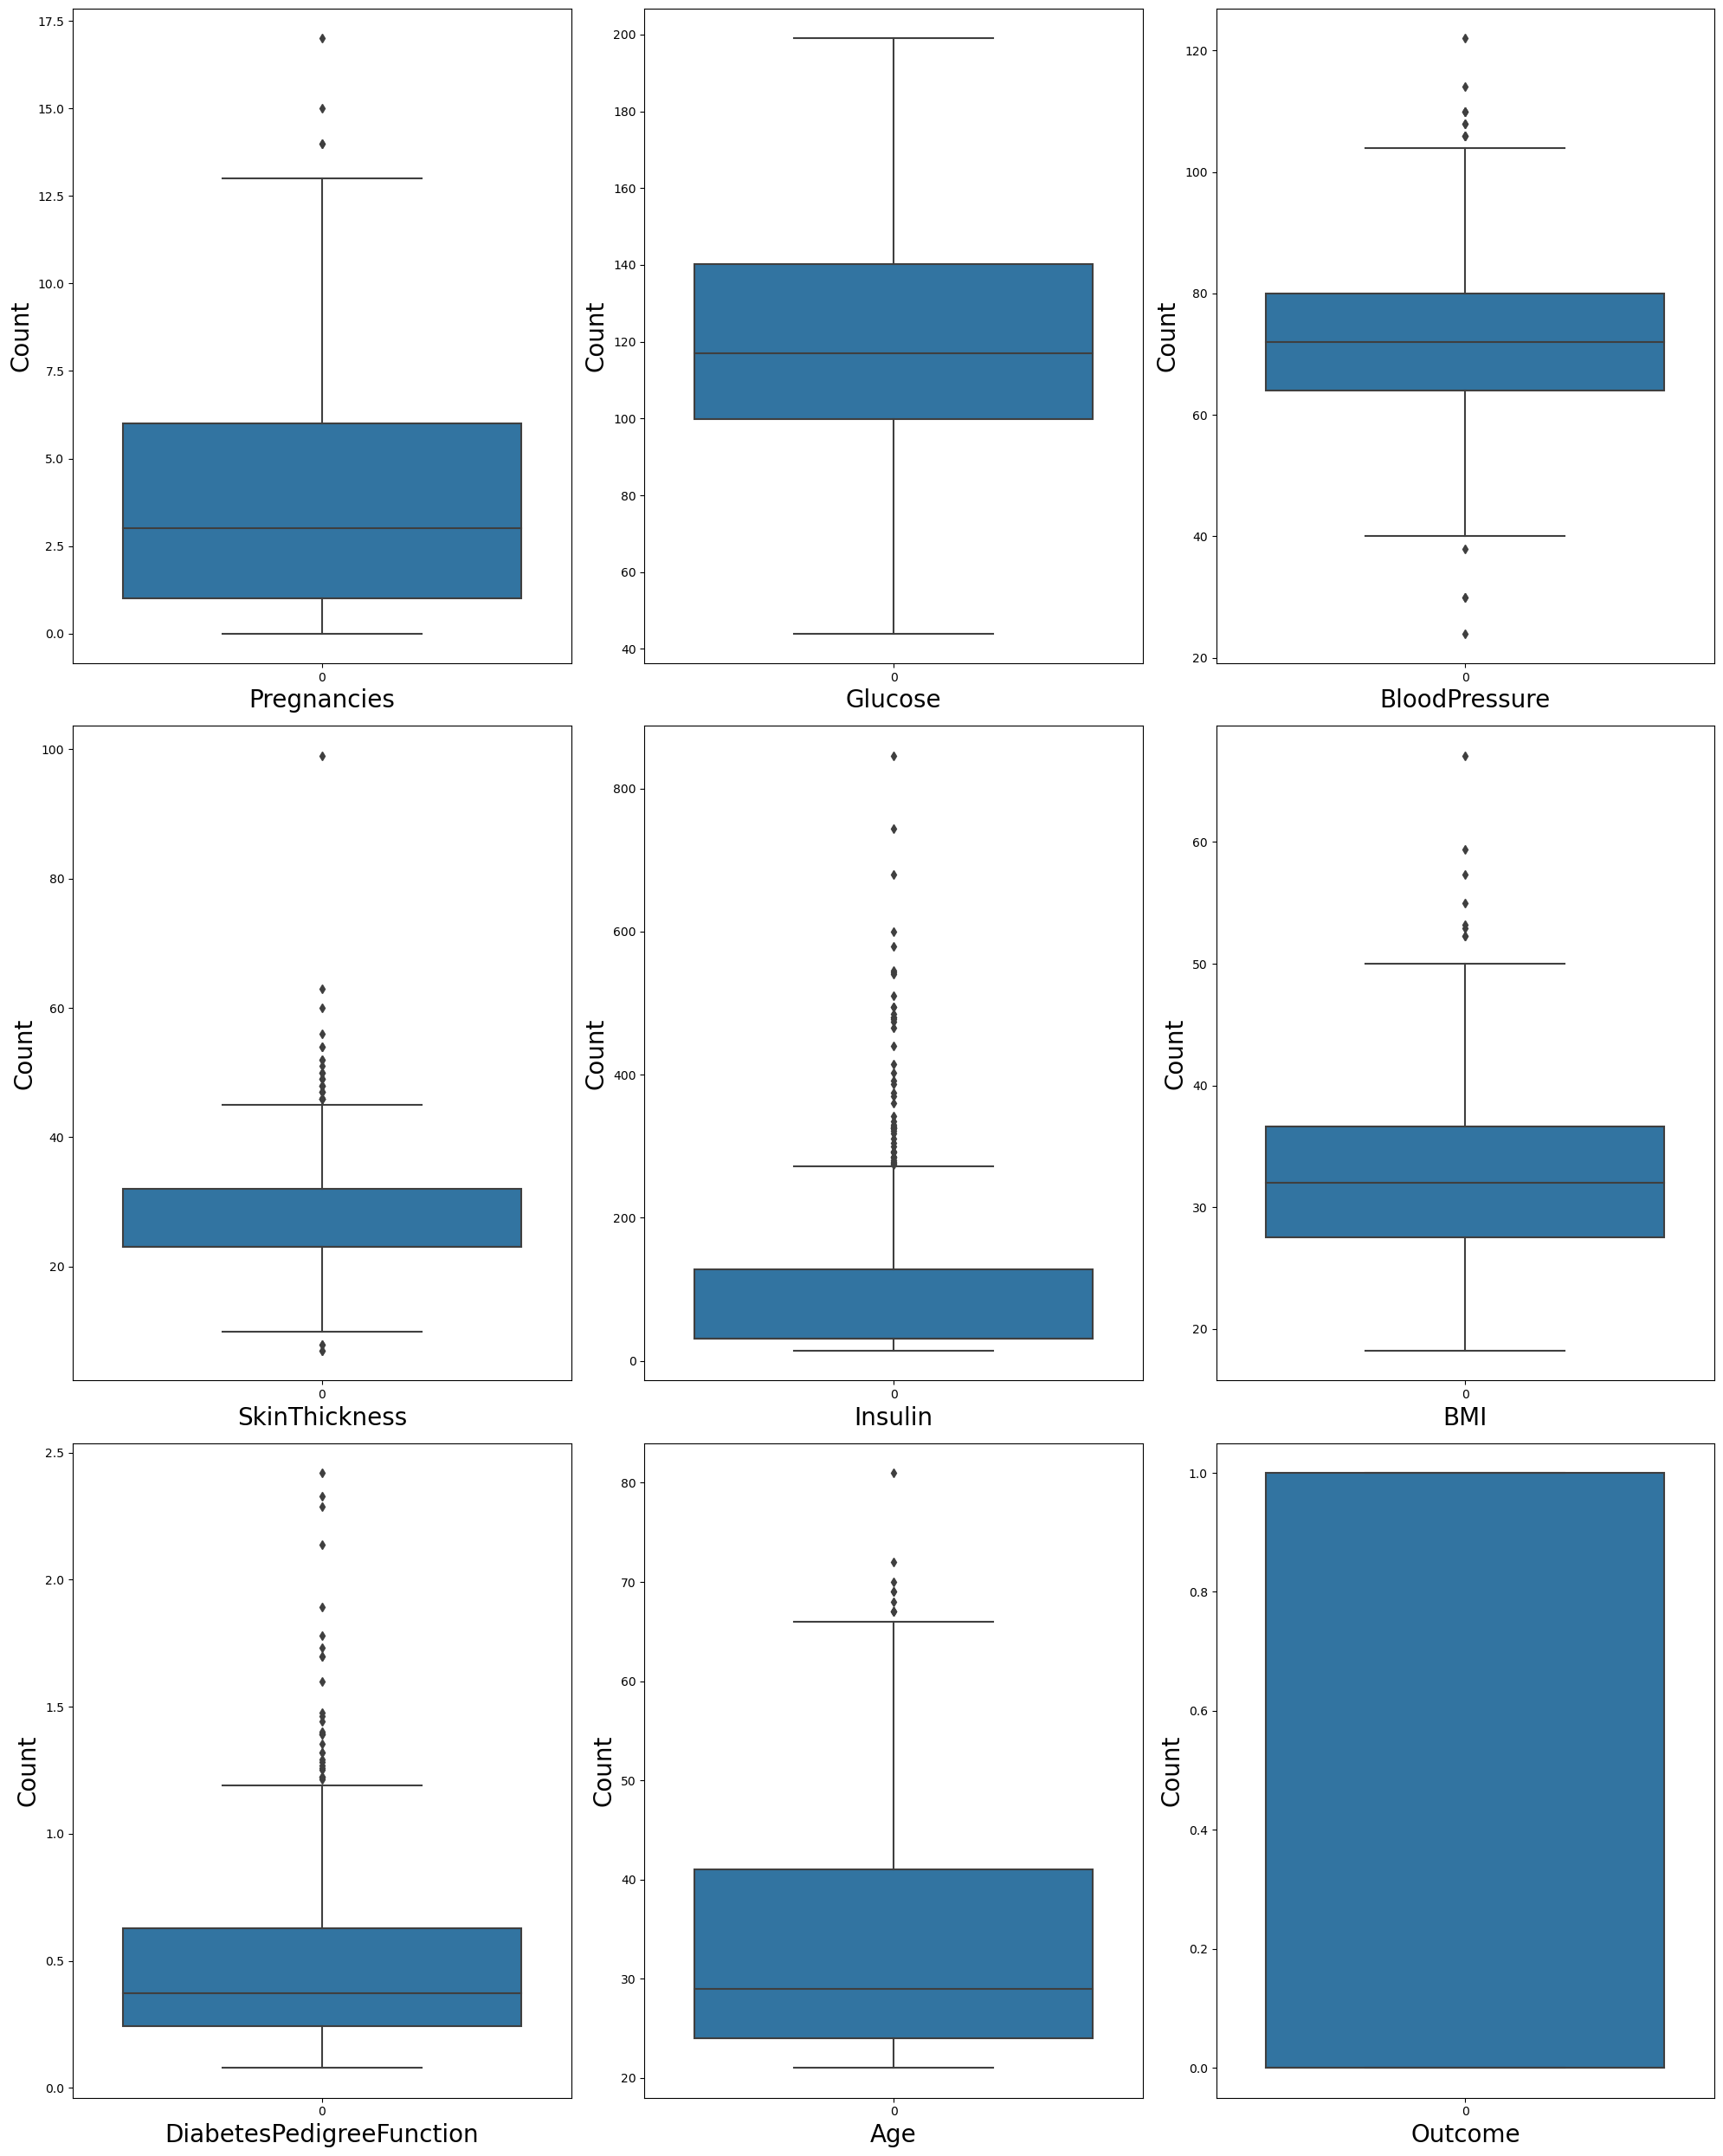

In [10]:
## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')  #Creating a canvas size of 20*25
plotnumber=1

for column in data:
    #if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [15]:
## Step 5:-Scaling the data(min max scaling) subtract each data point from mean and divide by (max-min)

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(dl,axis=1)) #fit_tranform -> everything will be converted based on the formula
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [16]:
con_data=data[["Pregnancies", "Outcome"]]

In [14]:
type(data1)

numpy.ndarray

In [17]:

data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [18]:
type(data2)

pandas.core.frame.DataFrame

In [19]:
final_df=pd.concat([data2,con_data],axis=1)

In [20]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


In [21]:
final_df.to_csv("readymade.csv")

In [22]:
pwd

'C:\\Users\\anura'

## Feature Selection

<Axes: >

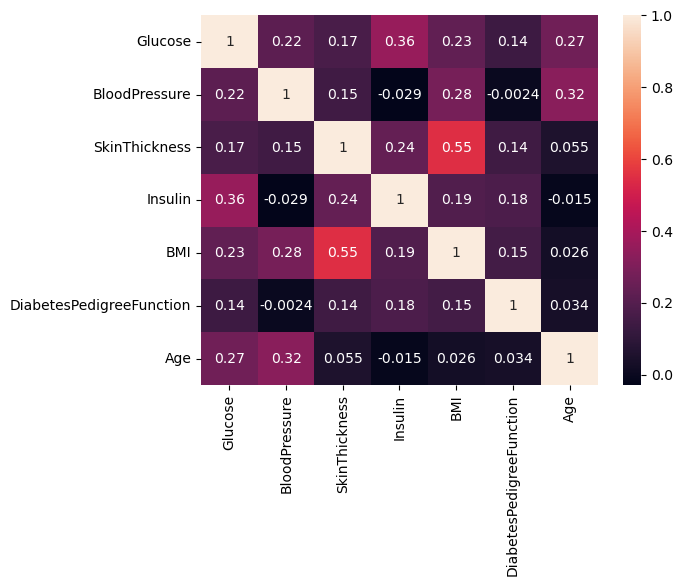

In [26]:
## No redundant fetaures
## We will check correlation
sns.heatmap(data2.corr(),annot=True)

# So no correlation hence no features should be 
#If there is high correlation then we should drop the column because it is not good for a machine learning model
#Dont remove it in the initial stage, if ml model doesnt perform well then remove the column

## Model Creation

In [27]:
final_df = pd.read_csv("readymade.csv")

In [28]:
final_df.head()

,Unnamed: 0,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1


In [29]:
## Step 1 Creating independent and dependent variable.

X=final_df.iloc[:,1:-1]
y=final_df.Outcome

In [30]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [31]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [32]:
## Step 4 Prediction
y_pred=clf.predict(X_test)

In [33]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [36]:
y_pred_prob=clf.predict_proba(X_test) #(1/1+e^-z)

In [37]:
y_pred_prob

array([[0.33663888, 0.66336112],
       [0.90120845, 0.09879155],
       [0.74778048, 0.25221952],
       [0.54684365, 0.45315635],
       [0.80474717, 0.19525283],
       [0.85889198, 0.14110802],
       [0.52870232, 0.47129768],
       [0.92249035, 0.07750965],
       [0.37432263, 0.62567737],
       [0.91524759, 0.08475241],
       [0.24175399, 0.75824601],
       [0.54821873, 0.45178127],
       [0.94364227, 0.05635773],
       [0.43773737, 0.56226263],
       [0.73748528, 0.26251472],
       [0.9002487 , 0.0997513 ],
       [0.07218234, 0.92781766],
       [0.60661705, 0.39338295],
       [0.39147734, 0.60852266],
       [0.91445218, 0.08554782],
       [0.6624536 , 0.3375464 ],
       [0.71800741, 0.28199259],
       [0.57672536, 0.42327464],
       [0.82045709, 0.17954291],
       [0.79528562, 0.20471438],
       [0.37223823, 0.62776177],
       [0.85560895, 0.14439105],
       [0.34452647, 0.65547353],
       [0.22571232, 0.77428768],
       [0.83282826, 0.16717174],
       [0.

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score

In [39]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[90 24]
 [14 26]]


In [41]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [42]:
y_test.head()

195    1
51     0
66     1
437    0
665    0
Name: Outcome, dtype: int64

In [43]:
b = pd.crosstab(y_pred,y_test)
b

Outcome,0,1
row_0,,
0,90,24
1,14,26


In [44]:
recall=recall_score(y_pred,y_test)
recall

0.65

In [45]:
precision=precision_score(y_pred,y_test)
precision

0.52

In [46]:
f1score=f1_score(y_test,y_pred)
f1score

0.5777777777777778

In [47]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       104
           1       0.65      0.52      0.58        50

    accuracy                           0.75       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.74      0.75      0.75       154



## Multiclass Classification

In [48]:
df=pd.read_csv("C:/Users/anura/Downloads/Iris.csv")

In [49]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
df.Species.replace("Iris-setosa",0,inplace=True)

In [68]:
df.Species.replace("Iris-virginica",1,inplace=True)

In [69]:
df.Species.replace("Iris-versicolor",2,inplace=True)

In [70]:
df.Species.unique()

array([0, 2], dtype=int64)